In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os

#### Q1 - Why encoding parater, what was in file that make it use

In [2]:
os.getcwd()
company = pd.read_csv('companies[1].txt', 
                      sep="\t", encoding= 'unicode_escape')

In [3]:
mapping = pd.read_csv('mapping[1].csv')

In [4]:
# Note encoding parameter
round2 = pd.read_csv('rounds2[1].csv', 
                     encoding= 'unicode_escape')

In [5]:
company.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [6]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [7]:
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


#### Lets explore 1st table - company

In [8]:
# lets see how many different companies are there
company['name'].unique().shape[0]

66103

In [9]:
# Lets see which top 20 countries has maximum companies
country_wise_company = company.groupby(['country_code'])['name'].count()
cwc = country_wise_company.sort_values(ascending = False).head(20)

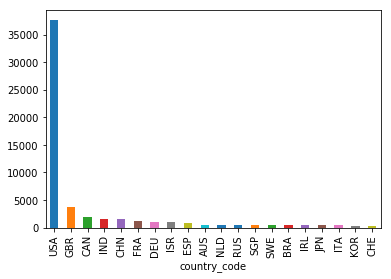

In [10]:
%matplotlib inline
cwc.plot(kind = 'bar')

In [11]:
# Lets see the different status of companies
company_status = company['status'].value_counts()

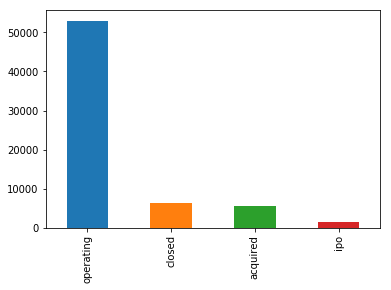

In [12]:
company_status.plot(kind='bar')

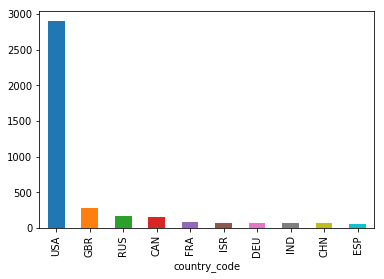

In [13]:
# I want to see the company count those are closed in countries with company status
comp_closed = company[company['status']=='closed'].groupby(['country_code'])['name'].count()
comp_closed = comp_closed.sort_values(ascending = False).head(10)

comp_closed.plot(kind='bar')

In [14]:
# contory wise companies those are in different status
comp_operating = company[company['status']=='operating'].groupby(['country_code'])['name'].count()
comp_operating = comp_operating.sort_values(ascending = False).head(10)

comp_acquired = company[company['status']=='acquired'].groupby(['country_code'])['name'].count()
comp_acquired = comp_acquired.sort_values(ascending = False).head(10)

comp_ipo = company[company['status']=='ipo'].groupby(['country_code'])['name'].count()
comp_ipo = comp_ipo.sort_values(ascending = False).head(10)

# fig, ax = plt.subplots(1,3)
# fig= plt.figure(figsize=(2,2))
# ax[0].plot(comp_operating)
# ax[1].plot()
# ax[2].plot()


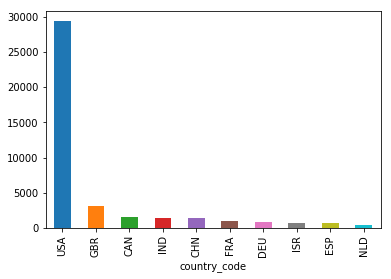

In [15]:
comp_operating.plot(kind='bar')

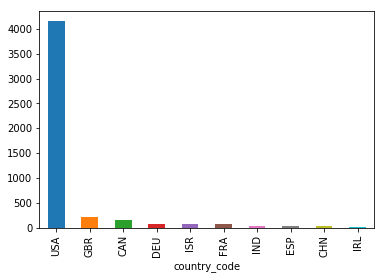

In [16]:
comp_acquired.plot(kind='bar')

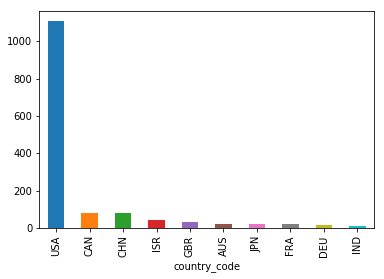

In [17]:
comp_ipo.plot(kind='bar')

#### Q2 -  How to plot bar plots for all three from plt.subplots()

In [18]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


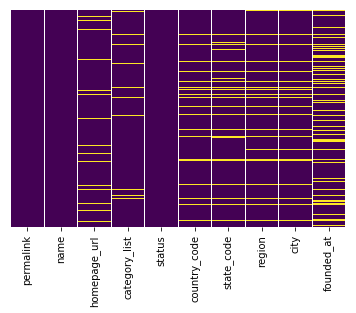

In [21]:
# check null values
#import seaborn as sns
sns.heatmap(company.isna(), cmap='viridis', yticklabels=False, cbar=False)

In [22]:
company.isna().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [23]:
company.head(1)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN


In [24]:
# explore category_list column
company['category_list'].unique().shape[0]

27297

In [25]:
# top 20 categories (row count wise)
cat_counts = company['category_list'].value_counts().sort_values(ascending = False).head(20)
cat_counts

Software               3995
Biotechnology          3615
E-Commerce             1332
Mobile                 1177
Clean Technology       1133
Curated Web            1050
Hardware + Software     932
Health Care             930
Games                   862
Enterprise Software     845
Manufacturing           773
Health and Wellness     770
Advertising             700
Education               585
Semiconductors          501
Finance                 447
Real Estate             425
Consulting              423
Security                410
Social Media            407
Name: category_list, dtype: int64

In [ ]:
# In company categoty_list there are multiple categories (seperated by |) mentioned for a company 
# Lets extract each category from it and create new row for each in table and delete original row
from tqdm import tqdm_notebook as tqdm

# cat_col = company['category_list']
# company_new = pd.DataFrame(columns=company.columns)
# for index, data in tqdm(cat_col.iteritems()):
#   #  print(index, data)
#     cats = []
#     row = company.iloc[index]
#     if(type(data) != str):
#         company_new = company_new.append(row, ignore_index=True)
#         continue
    
#     if '|' in data:
#         cats = data.split('|')
#       #  print(cats)
#         for i in range(len(cats)):
#             company_new = company_new.append(row, ignore_index=True)
#           #  print(cats[i])
#             ind = company_new.shape[0] - 1
#             company_new.loc[ind,'category_list'] = cats[i]
#     else:
#         company_new = company_new.append(row, ignore_index=True)
    

In [ ]:
#company_new.shape


In [ ]:
## check if category column still have multiple categories in one row
cat_col = company_new['category_list']
count = 0
for index, data in tqdm(cat_col.iteritems()):
    if(type(data) != type("Akshay")):
        continue
   
    if '|' in data:
        count = count + 1
        
count
# cool, we are good now

In [ ]:
# lets see if same company listed many times and category is not mentioned
names = company[company['category_list'].isna()]['name']
comp_cat_list = pd.DataFrame(columns=['name','category_list'])
for name in names:
     comp_cat_list = comp_cat_list.append(company[(company['name'] == name) & company['category_list'].notna()][['name','category_list']], ignore_index=False)
comp_cat_list.shape

In [ ]:
comp_cat_list.groupby(['name'])['category_list'].count()

In [ ]:
names = company[company['country_code'].isna()]['name']
comp_country_list = pd.DataFrame(columns=['name','cont_list'])
for name in names:
     comp_country_list = comp_country_list.append(company[(company['name'] == name) & company['country_code'].notna()][['name','country_code']], ignore_index=False)
comp_country_list.shape

In [ ]:
names = company[company['state_code'].isna()]['country_code']
names = names.dropna()
comp_state_list = pd.DataFrame(columns=['country_code','state_code'])
for name in names:
   # print(name)
   # print(company[(company['country_code'] == name)][['country_code','state_code']])
   comp_state_list = comp_state_list.append(company[(company['country_code'] == name) & company['state_code'].notna()][['country_code','state_code']], ignore_index=True)
comp_state_list.shape

In [ ]:
# Lets get rid of missing values
company_data = company.dropna(subset = ['name','category_list','country_code','state_code','city'])

In [ ]:
# does region and city has same values

company[company['region'] == company['city']].count()

In [ ]:
# removing few coluns from company -  permalink, homepage_url, region, founded_at
company_data = company_data.drop(axis=1, columns=['homepage_url', 'region', 'founded_at'])
company_data.shape

In [ ]:
company_data.isna().sum()

In [ ]:
company_data.isnull().sum()

In [ ]:
# Lets explore the second table and merge it with first one - mapping table
mapping.head(2)

In [ ]:
mapping.info()

In [ ]:
mapping.shape

In [ ]:
mapping.isna().sum()

In [ ]:
(mapping['Blanks'] == 1).sum()

In [ ]:
mapping_data = mapping.dropna()
mapping_data = mapping_data.drop(axis=1, columns=['Blanks'])
mapping_data.shape

In [ ]:
mapping_data.columns

In [ ]:
# check if there is no duplicatge sub category listed
mapping_data['category_list'].unique().shape[0]

In [ ]:
# check if one sub category is not assigned to more than 1 category (one to many - not accepted)
print("column wise sum :")
print(mapping_data.sum(axis=1, numeric_only=True, skipna = True).max())

# check if multiple sub categories assigned to one category ( many to one - accepted) 
print("row wise sum : ")
t = mapping_data.sum(axis=0, numeric_only=True, skipna = True)
print(t)

In [ ]:
t.plot(kind = 'bar')

In [ ]:
# before joining tables , lets see if both tables has same category_list
company_cat = set(company['category_list'])
mapping_cat = set(mapping['category_list'])
c_i_m = company_cat.intersection(mapping_cat)


print("company cat : ",len(company_cat),"\n mapping cat : ",len(mapping_cat), "\n common cat : ",len(c_i_m), 
      "\n company-common cat : ", len(company_cat)-len(c_i_m), "\n mapping-common cat : ", len(mapping_cat)-len(c_i_m))

In [ ]:
# Lets join two tables
company_mapping = company_data.merge(mapping_data, left_on='category_list', right_on='category_list', how='left')
# check indicator parameter here
print(company_data.shape, mapping_data.shape, company_mapping.shape)

In [ ]:
company_mapping

In [ ]:
company_mapping.isna().sum()

In [ ]:
# above mapping is not good
# lets make a map function using fuzzy logic
import fuzzywuzzy
from fuzzywuzzy import process

def cat_mapping(cat1, cat2):
    '''cat1 is category that needs to be mapped , company table category in this case
        cat2 is category into which it needs to be mapped, mapping table in this case '''
    
    for cat in cat1:
        highest = process.extractOne(cat,cat2)
        print(cat, " -----> ", highest)
        
cat_mapping(company['category_list'].head(50), mapping.loc[1::]['category_list'])

In [ ]:
# Lets check third table - round2
round2.head(2)

In [ ]:
round2.isna().sum()

In [ ]:
catt = map(lambda cat: cat.lower(), mapping['category_list'].tail())

In [ ]:
list(catt)

In [ ]:
mapping['category_list'].head()

In [ ]:
mapping.loc[1::]['category_list']

In [ ]:
row = company['category_list'].head()

In [ ]:
row.iteritems

In [ ]:
for (r,i) in row.iteritems():
    print(r,"   ",i)

In [ ]:
type(company.iloc[1])

In [ ]:
d= float('NaN')

type(d)

In [ ]:
if(np.notnan(d)):
    print('not na')
else:
    print("na")

In [ ]:
 company.iloc[-1]['category_list']

In [ ]:
company_new.head(10)

In [ ]:
type(company['category_list'][0]) == str

In [ ]:
os.getcwd()

In [ ]:
# company_new.to_csv("company_new.csv")

In [28]:
company_new = pd.read_csv("company_new.csv")

In [29]:
company_new = company_new.drop(['Unnamed: 0'], axis=1)
company_new.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-Qounter,:Qounter,http://www.qounter.com,Real Time,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/Organization/-Qounter,:Qounter,http://www.qounter.com,Social Network Media,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps,operating,NaN,NaN,NaN,NaN,NaN


In [ ]:
# before joining tables , lets see if both tables has same category_list
company_new_cat = set(company_new['category_list'])
mapping_cat = set(mapping['category_list'])
c_i_m = company_new_cat.intersection(mapping_cat)


print("company cat : ",len(company_new_cat),"\n mapping cat : ",len(mapping_cat), "\n common cat : ",len(c_i_m), 
      "\n company-common cat : ", len(company_new_cat)-len(c_i_m), "\n mapping-common cat : ", len(mapping_cat)-len(c_i_m))

In [ ]:
# Lets join two tables
company_sector = company_new.merge(mapping, left_on='category_list', right_on='category_list', how='left')
company_sector.head()

In [ ]:
d=company_sector.dropna(how='any', subset=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])
d.shape

In [ ]:
company_sector.shape

In [ ]:
# so there are (155806 - 143311) = 12495 rows those are not mapped
(155806 - 143311)

# can we sacrifice them ?

In [ ]:
# lets check how many rows we need to sacrifice if we want to remove all nan
d=company_sector.dropna(how='any')
d.shape



In [ ]:
(155806 - 102786)
# still we have good amount of data, but we loose 53020 rows here

### lets not make any drop now, just preapre a dataset combining three tables and then we analyse what can we remove

In [26]:
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [54]:
# we can combine two tables at company_permalink
# before that lets check if permalinks in both tables has same values
# before joining tables , lets see if both tables has same category_list

def check_common(col1, col2):
    col1 = set(col1.str.lower())
    col2 = set(col2.str.lower())
    common = col1.intersection(col2)


    print("col1: ",len(col1),"\n col2 : ",len(col2), "\n common : ",len(common), 
          "\n col1-common : ", len(col1)-len(common), "\n mapping-common cat : ", len(col2)-len(common))

check_common(company_new['permalink'], round2['company_permalink'])

col1:  66368 
 col2 :  66368 
 common :  66368 
 col1-common :  0 
 mapping-common cat :  0


In [35]:
# How many unique companies are present in rounds2? - 90247
round2['company_permalink'].unique().shape

(114949,)

In [52]:
# How many unique companies are present in companies - 66368
company_new['permalink'].unique().shape

(66368,)

In [37]:
company_new['name'].unique().shape

(66103,)

In [45]:
# companies present in round2 table and not in companies table
company_new['permalink'] = company_new['permalink'].str.lower()
round2['company_permalink'] = round2['company_permalink'].str.lower()

round2.loc[~round2['company_permalink'].isin(set(company_new['permalink'])),:]



,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
38823,/organization/e-cãbica,E CÃBICA,NaN,NaN,operating,NaN,NaN,NaN,NaN,NaN
41780,/organization/energystone-games-çµçÿ³æ¸¸æ,EnergyStone Games çµç³æ¸¸æ,NaN,Mobile Games,closed,NaN,NaN,NaN,NaN,06-01-2013
41781,/organization/energystone-games-çµçÿ³æ¸¸æ,EnergyStone Games çµç³æ¸¸æ,NaN,Online Gaming,closed,NaN,NaN,NaN,NaN,06-01-2013
60829,/organization/huizuche-com-æ ç§è½¦,Huizuche.com æ ç§è½¦,http://huizuche.com,NaN,closed,NaN,NaN,NaN,NaN,24-04-2014
136309,/organization/tipcat-interactive-æ²èä¿¡æ¯ç...,TipCat Interactive æ²èä¿¡æ¯ç§æ,http://www.tipcat.com,Mobile Games,closed,NaN,NaN,NaN,NaN,18-08-2009
136310,/organization/tipcat-interactive-æ²èä¿¡æ¯ç...,TipCat Interactive æ²èä¿¡æ¯ç§æ,http://www.tipcat.com,Online Gaming,closed,NaN,NaN,NaN,NaN,18-08-2009
154370,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Internet,closed,NaN,NaN,NaN,NaN,17-07-2010
154371,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Mobile Games,closed,NaN,NaN,NaN,NaN,17-07-2010
154372,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Online Gaming,closed,NaN,NaN,NaN,NaN,17-07-2010


In [46]:
company_new.loc[~company_new['permalink'].isin(set(round2['company_permalink'])),:]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
38823,/organization/e-cãbica,E CÃBICA,NaN,NaN,operating,NaN,NaN,NaN,NaN,NaN
41780,/organization/energystone-games-çµçÿ³æ¸¸æ,EnergyStone Games çµç³æ¸¸æ,NaN,Mobile Games,closed,NaN,NaN,NaN,NaN,06-01-2013
41781,/organization/energystone-games-çµçÿ³æ¸¸æ,EnergyStone Games çµç³æ¸¸æ,NaN,Online Gaming,closed,NaN,NaN,NaN,NaN,06-01-2013
60829,/organization/huizuche-com-æ ç§è½¦,Huizuche.com æ ç§è½¦,http://huizuche.com,NaN,closed,NaN,NaN,NaN,NaN,24-04-2014
136309,/organization/tipcat-interactive-æ²èä¿¡æ¯ç...,TipCat Interactive æ²èä¿¡æ¯ç§æ,http://www.tipcat.com,Mobile Games,closed,NaN,NaN,NaN,NaN,18-08-2009
136310,/organization/tipcat-interactive-æ²èä¿¡æ¯ç...,TipCat Interactive æ²èä¿¡æ¯ç§æ,http://www.tipcat.com,Online Gaming,closed,NaN,NaN,NaN,NaN,18-08-2009
154370,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Internet,closed,NaN,NaN,NaN,NaN,17-07-2010
154371,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Mobile Games,closed,NaN,NaN,NaN,NaN,17-07-2010
154372,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Online Gaming,closed,NaN,NaN,NaN,NaN,17-07-2010


In [48]:
# above permalinks are not english readable characters, but in excel we have proper english readable
# looks like we have used wrong encoding
# to fix this problem first encode the data with 'utf-8' and then decode it with 'ascii'

round2['company_permalink'] = round2['company_permalink'].str.encode('utf-8').str.decode('ascii','ignore')
round2.loc[~round2['company_permalink'].isin(set(company_new['permalink'])),:]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
2670,/organization/adslinked,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0
4568,/organization/allgu-outlet,/funding-round/49e8a9b54ed19c8505ca92dc031a8e9c,venture,NaN,17-03-2015,1400000.0
8097,/organization/asiansbook,/funding-round/3f243ab92b4fe397d41b4734a17ca5f0,seed,NaN,15-09-2014,100000.0
8652,/organization/atlye-gri,/funding-round/75bdeacd95a647108aa4bc480e77894d,grant,NaN,01-11-2012,13940.0
9784,/organization/axgaz,/funding-round/511a41181aaf193bbd419babfb8d66e9,venture,NaN,06-07-2015,4094392.0
14311,/organization/boral-bikes-incorporated,/funding-round/be79575bf4b5b5d6fa64670800a3ca5e,seed,NaN,26-02-2015,NaN


In [49]:
company_new['permalink'] = company_new['permalink'].str.encode('utf-8').str.decode('ascii','ignore')
company_new.loc[~company_new['permalink'].isin(set(round2['company_permalink'])),:]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [50]:
company_new.to_csv('company_clean.csv', index = False)
round2.to_csv('round2_clean.csv', index = False)

In [55]:
check_common(company_new['permalink'], round2['company_permalink'])

col1:  66368 
 col2 :  66368 
 common :  66368 
 col1-common :  0 
 mapping-common cat :  0


## Perfect for joining now